In [2]:
import tensorflow.keras as k

In [3]:
from lenet_5 import lenet

In [4]:
(X_train, y_train), (X_vald, Y_valid) = k.datasets.mnist.load_data()

y_one_hot = k.utils.to_categorical(y_train, num_classes=10)
Y_valid_one_hot = k.utils.to_categorical(Y_valid, num_classes=10)
m, h, w = X_train.shape

x_train_reshape = X_train.reshape((-1, h, w, 1))
X_vald_reshape = X_vald.reshape((-1, h, w, 1))
x = k.Input(shape=(h, w, 1))
model = lenet(x)
model.fit(x_train_reshape, y_one_hot, batch_size=32, epochs=5, validation_data=(X_vald_reshape, Y_valid_one_hot))


2025-08-24 22:09:44.753161: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/5


2025-08-24 22:09:45.505416: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 47040000 exceeds 10% of free system memory.


   2/1875 ━━━━━━━━━━━━━━━━━━━━ 2:10 70ms/step - accuracy: 0.0781 - loss: 502.5970 

2025-08-24 22:09:51.718265: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 24840000 exceeds 10% of free system memory.
2025-08-24 22:09:51.728088: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 24840000 exceeds 10% of free system memory.
2025-08-24 22:09:51.780019: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 25244800 exceeds 10% of free system memory.
2025-08-24 22:09:51.829258: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 24840000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 88s 44ms/step - accuracy: 0.8865 - loss: 3.5561 - val_accuracy: 0.9444 - val_loss: 0.4243
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 145s 46ms/step - accuracy: 0.9504 - loss: 0.2888 - val_accuracy: 0.9533 - val_loss: 0.2239
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 102s 54ms/step - accuracy: 0.9638 - loss: 0.1488 - val_accuracy: 0.9678 - val_loss: 0.1399
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 137s 52ms/step - accuracy: 0.9703 - loss: 0.1115 - val_accuracy: 0.9700 - val_loss: 0.1100
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 152s 57ms/step - accuracy: 0.9758 - loss: 0.0862 - val_accuracy: 0.9739 - val_loss: 0.0909


In [42]:
y_predict = model.predict(X_vald_reshape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step


In [43]:
y_predict.shape

(10000, 10)

In [44]:
print(y_predict[0])

[3.11000911e-20 2.56716794e-13 2.63585309e-09 7.82669502e-12
 1.50041513e-09 1.20989265e-13 3.52701045e-18 9.99999940e-01
 1.06970935e-14 7.53716464e-11]


In [45]:
import numpy as np
y_predict = np.argmax(y_predict, axis=1)

0


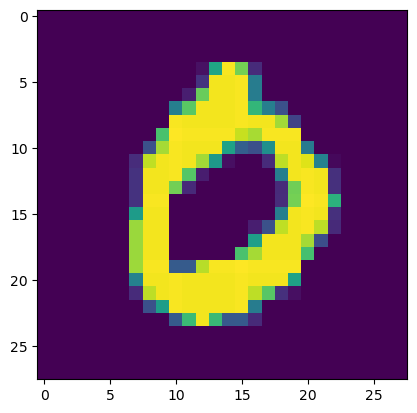

In [47]:
import matplotlib.pyplot as plt
import numpy as np

print(y_predict[3])
plt.imshow(X_vald_reshape[3])
plt.show()


Predicted class: 4
Raw probabilities: [2.5765850e-13 1.0784479e-11 1.3226948e-09 4.1000034e-10 9.9999934e-01
 5.5943667e-13 5.2752734e-14 5.6611924e-07 3.0607442e-10 8.9774251e-11]


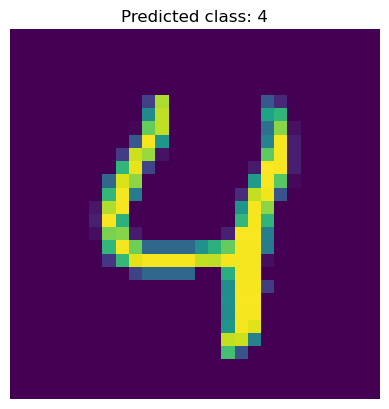

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# First convert probabilities to class labels
y_predict_labels = np.argmax(y_predict, axis=1)

# Now you can access the predicted class
print("Predicted class:", y_predict_labels[4])
print("Raw probabilities:", y_predict[4])  # Optional: see the actual probabilities

plt.imshow(X_vald_reshape[4])
plt.title(f"Predicted class: {y_predict_labels[4]}")
plt.axis('off')
plt.show()